# Question 2: Gradient descent and Ridge Regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm
import random

In [18]:
data_train = np.genfromtxt("A2Q2Data_train.csv", delimiter=',')
print(data_train.shape)
data_train_x = data_train[:,0:-1]
data_train_y = data_train[:, 100].reshape(len(data_train),1)
print(data_train_x.shape, data_train_y.shape)

(10000, 101)
(10000, 100) (10000, 1)


In [19]:
data_test = np.genfromtxt("A2Q2Data_test.csv", delimiter=',')
print(data_test.shape)
data_test_x = data_test[:,0:-1]
data_test_y = data_test[:, 100].reshape(len(data_test),1)
print(data_test_x.shape, data_test_y.shape)

(500, 101)
(500, 100) (500, 1)


In [20]:
def do_gradient_descent(data,labels,theta,lr,n_points,n_iter):
    cost_hist = []
    for i in tqdm(range(n_iter),ncols=120):
        proj_feature = np.dot(data,theta)
        loss = proj_feature - labels
        cost = np.sum(loss**2)/(2*n_points)
        cost_hist.append(cost)
        grad = np.dot(data.T,loss)/n_points
        # update theta
        theta = theta-lr*grad
    return theta, cost_hist

In [21]:
def do_stoch_gradient_descent(data,labels,theta,lr,n_points,n_iter,batch_size=100):
    cost_hist = []
    for i in tqdm(range(0,n_iter),ncols=120): 
        idx = np.random.uniform(0,n_points,size=batch_size).astype(np.int32)
        x_mod,y_mod = data[idx],labels[idx]
        # x_mod,y_mod = data[i:i+batch_size,:], labels[i:i+batch_size]
        proj_feature = np.dot(x_mod,theta)
        loss = proj_feature - y_mod
        cost = np.sum(loss**2)/(2*n_points)
        cost_hist.append(cost)
        grad = np.dot(x_mod.T,loss)/n_points
        # update theta
        theta = theta-lr*grad
    return theta, cost_hist

In [22]:
def do_ridge_regression(data,labels,theta,lr,n_points,n_iter,lamda_=0.1):
    cost_hist = []
    for i in tqdm(range(n_iter),ncols=120):
        proj_feature = np.dot(data,theta)
        loss = proj_feature - labels
        cost = np.sum(loss**2)/(2*n_points) + lamda_*np.linalg.norm(theta)**2
        cost_hist.append(cost)
        grad = np.dot(data.T,loss)/n_points
        # update
        theta = theta-lr*grad
    return theta, cost_hist

In [23]:
m,n = data_train_x.shape
numIterations= 1000
alpha = 0.0005
theta = np.random.randn(n)
theta_gd,cost_hist_gd = do_gradient_descent(data_train_x, data_train_y[:,0], theta, alpha, m, numIterations)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.10it/s]


In [24]:
m,n = data_train_x.shape
numIterations= 1000
alpha = 0.0005
theta = np.random.randn(n)
theta_sgd,cost_hist_sgd = do_stoch_gradient_descent(data_train_x, data_train_y[:,0], theta, alpha, m, numIterations,100)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3799.96it/s]


In [25]:
m,n = data_train_x.shape
numIterations= 1000
alpha = 0.0005
theta = np.random.randn(n)
lamda_list = [1,0.1,0.01,0.001]
theta_rr,cost_hist_rr = np.zeros((n,len(lamda_list))),np.zeros((numIterations,len(lamda_list)))
for i in range(len(lamda_list)):
    print('trying lamda:',lamda_list[i])
    theta_rr[:,i],cost_hist_rr[:,i] = do_ridge_regression(data_train_x, data_train_y[:,0], theta, alpha, m, numIterations,lamda_list[i])
theta_rr.shape

trying lamda: 1


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 135.58it/s]


trying lamda: 0.1


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.95it/s]


trying lamda: 0.01


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.76it/s]


trying lamda: 0.001


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.08it/s]


trying lamda: 0.5


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 149.86it/s]


trying lamda: 0.05


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 153.41it/s]


trying lamda: 0.005


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 143.72it/s]


(100, 7)

Text(0.5, 0, '#iters')

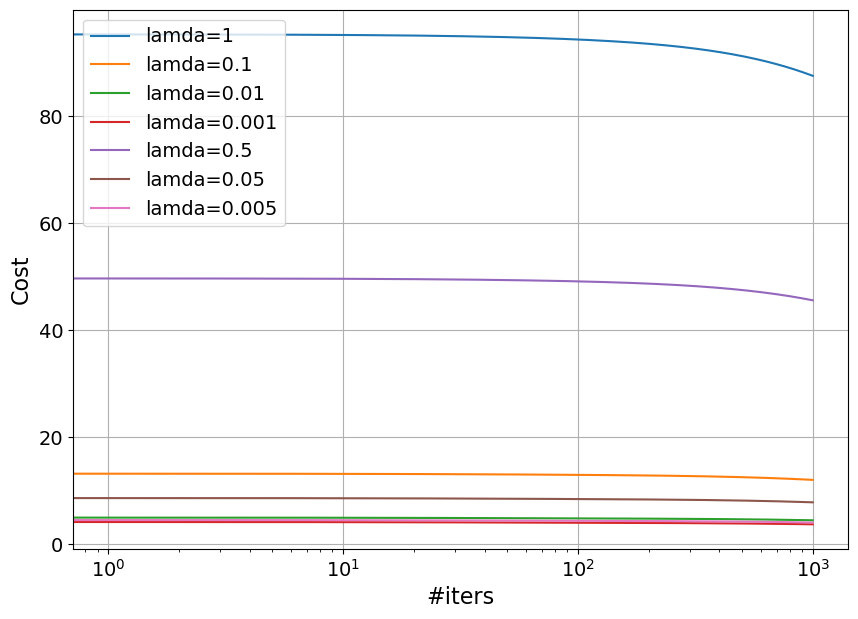

In [26]:
plt.figure(figsize=(10,7))
for i in range(len(lamda_list)):
    plt.plot(cost_hist_rr[:,i],label='lamda={_i}'.format(_i=lamda_list[i]))

plt.grid()
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.xscale('log')
plt.ylabel('Cost',fontsize=16)
plt.xlabel('#iters',fontsize=16)

Text(0.5, 0, '#iters')

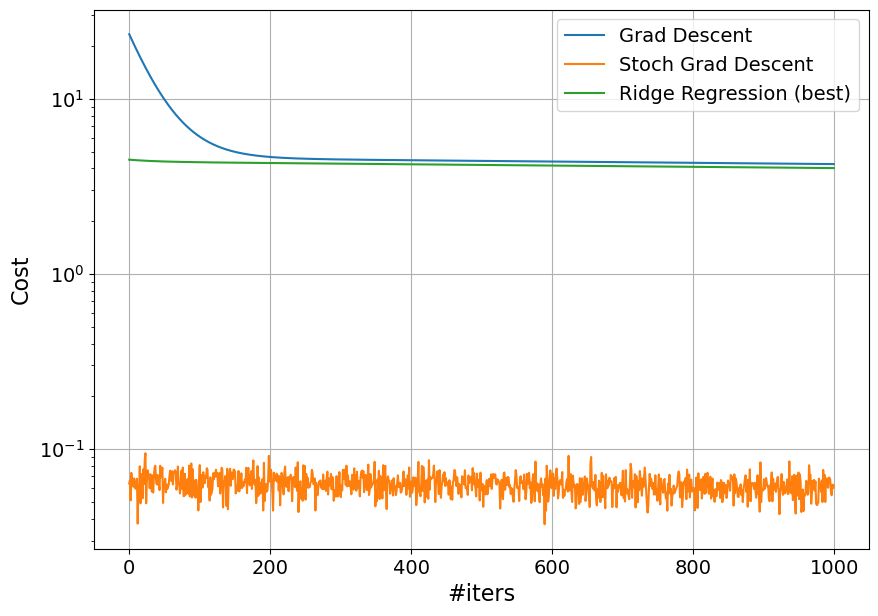

In [27]:
plt.figure(figsize=(10,7))
plt.plot(cost_hist_gd,label='Grad Descent')
plt.plot(cost_hist_sgd,label='Stoch Grad Descent')
plt.plot(cost_hist_rr[:,-1],label='Ridge Regression (best)')
plt.grid()
_ = plt.xticks(fontsize=14)
_ = plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.yscale('log')
plt.ylabel('Cost',fontsize=16)
plt.xlabel('#iters',fontsize=16)

In [28]:
pred_label_gd = np.matmul(data_test_x, theta_gd[:,np.newaxis])
pred_label_sgd = np.matmul(data_test_x, theta_sgd[:,np.newaxis])
pred_label_rr = np.matmul(data_test_x, theta_rr[:,3][:,np.newaxis])

In [29]:
mse_gd = (np.square(pred_label_gd - data_test_y)).mean(axis=0)
mse_sgd = (np.square(pred_label_sgd - data_test_y)).mean(axis=0)
mse_rr = (np.square(pred_label_rr - data_test_y)).mean(axis=0)

print('MSE Gradient Descent: ',mse_gd)
print('MSE Stochastic Gradient Descent: ',mse_sgd)
print('MSE Ridge Regression: ',mse_rr)

MSE Gradient Descent:  [7.98913935]
MSE Stochastic Gradient Descent:  [11.50726728]
MSE Ridge Regression:  [7.32128438]
